In [1]:
from innolux import *
project_data_path = data_path / "T1 6212 重啟"


In [2]:
project_data_path

WindowsPath('D:/Documents/Projects/innolux/data/T1 6212 重啟')

In [3]:
from innolux import UShape

def file_name_parser(file_name):
    _, gamma, panel_id, cond, vgl, _, vw, *_ = file_name.split("_")
    return {
        "Gamma Code": gamma,
        "Condition": cond,
        "Panel ID": panel_id,
        "VGLO": -int(vgl[-2:]),
        "Vw": float(vw),
    }

In [4]:
ushape_logs = UShape.batch_parser(
    project_data_path,
    lambda f: UShape.parser(f, file_name_parser)
)


In [7]:
ushape_logs.write_excel(r'D:\tmp\ushape_total.xlsx')

In [50]:
w_drift_logs = []
for panel_id in ushape_logs["Panel ID"].unique():
    tmp_df = ushape_logs.filter(pl.col("Panel ID")==panel_id)
    tmp_df = pl.concat([tmp_df.filter(
        pl.col("Stress Time(hr)") == 0,
        pl.col("灰階") == 128
    ).select(
        'Gamma Code',
        'Condition',
        "VGLO",
        "Vw",
        'Panel ID',
        "Region",
    ),
        (tmp_df.filter(
        pl.col("Stress Time(hr)") == 6,
        pl.col("灰階") == 128
    ).select(
        # "Region",
        # "Stress Time(hr)",
        "白格 Vcom(Fitting)",
    ) - tmp_df.filter(
        pl.col("Stress Time(hr)") == 0,
        pl.col("灰階") == 128
    ).select(
        # "Region",
        # "Stress Time(hr)",
        "白格 Vcom(Fitting)",
    )) * 10
    ], how="horizontal").rename(
        {"白格 Vcom(Fitting)" : "W drift"}
    )
    w_drift_logs.append(tmp_df)
w_drift_df = pl.concat(w_drift_logs)
w_drift_df

Gamma Code,Condition,VGLO,Vw,Panel ID,Region,W drift
str,str,i32,f64,str,str,f64
"""W-300 D+175 L51+50""","""SEUV7000""",-12,5.6,"""05C4H""","""[0]/[1]""",-88.84
"""W-300 D+175 L51+50""","""SEUV7000""",-12,5.6,"""05C4H""","""[2]/[3]""",-7.79
"""W-300 D+175 L51+50""","""SEUV7000""",-12,5.6,"""05C4H""","""[4]/[5]""",-20.05
"""W-300 D+175 L51+50""","""SEUV7000""",-12,5.6,"""05C4H""","""[6]/[7]""",77.48
"""W-300 D+175 L51+50""","""SEUV7000""",-12,5.6,"""05C4H""","""[8]/[9]""",77.6
…,…,…,…,…,…,…
"""W-400 D+150 L51+50""","""STD""",-12,5.6,"""21B2B""","""[8]/[9]""",66.25
"""W-400 D+150 L51+50""","""STD""",-12,5.6,"""21B2B""","""[10]/[11]""",36.26
"""W-400 D+150 L51+50""","""STD""",-12,5.6,"""21B2B""","""[12]/[13]""",-112.0


In [201]:
w_drift_df.write_csv('w_drift.csv')

In [10]:
w_drift_df.filter(
    pl.col("Condition") == "STD",
    # pl.col("Gamma Code") == "對稱",   
).sort('W drift')

Gamma Code,Condition,VGLO,Vw,Panel ID,Region,W drift
str,str,i32,f64,str,str,f64
"""W-400 D+150 L51+25""","""STD""",-12,5.6,"""21B27""","""[12]/[13]""",-96.7
"""W-400 D+150 L51+25""","""STD""",-12,5.6,"""21B27""","""[0]/[1]""",-89.9
"""W-350 D+150 L51+25""","""STD""",-12,5.6,"""21C4H""","""[0]/[1]""",-67.59
"""W-400 D+150 L51+50""","""STD""",-12,5.6,"""21A21""","""[12]/[13]""",-61.41
"""W-300 D+200 L51+50""","""STD""",-14,5.6,"""21B3C""","""[0]/[1]""",-58.63
…,…,…,…,…,…,…
"""對稱""","""STD""",-12,5.8,"""21A23""","""[10]/[11]""",183.36
"""對稱""","""STD""",-14,5.6,"""21A14""","""[2]/[3]""",185.26
"""對稱""","""STD""",-14,5.8,"""21A24""","""[14]/[15]""",185.46


In [75]:
cond = (w_drift_df
        .select(("Vw" +  pl.col("Vw").cast(str) + "_Vgl" + pl.col("VGLO").cast(str) + "_" + pl.col("Condition") + '_' + pl.col("Gamma Code")+ '_' + pl.col("Panel ID")).alias('條件'))
        .unique()
)

In [76]:
for i, c in enumerate(cond['條件'].sort().unique()):
    print(c)

Vw5.6_Vgl-14_STD_W-300 D+200 L51+50_21B3C
Vw5.8_Vgl-12_STD_對稱_21A23
Vw5.6_Vgl-12_STD_W-400 D+150 L51+25_21B27
Vw5.6_Vgl-12_24+24_W-300 D+175 L51+50_07A23
Vw5.6_Vgl-14_STD_W-300 D+175 L51+25_21B1C
Vw5.6_Vgl-14_STD_對稱_21A14
Vw5.6_Vgl-14_STD_W-300 D+175 L51+75_21B1B
Vw5.6_Vgl-12_STD_W-400 D+150 L51+50_21B2B
Vw5.6_Vgl-12_ARO2ODF60min_W-300 D+175 L51+50_07A21
Vw5.6_Vgl-12_STD_W-300 D+175 L51+50_21B2C
Vw5.8_Vgl-14_STD_對稱_21A24
Vw5.6_Vgl-12_SEUV7000_W-300 D+175 L51+50_05C4H
Vw5.6_Vgl-14_STD_W-300 D+175 L51+50_21A11
Vw5.6_Vgl-12_STD_W-350 D+150 L51+25_21C4H
Vw5.6_Vgl-12_LCtoCHB540s_W-300 D+175 L51+50_19B38
Vw5.6_Vgl-12_ODFtoSEUV520sec_W-300 D+175 L51+50_06A64
Vw5.6_Vgl-12_STD_W-400 D+150 L51+50_21A21
Vw5.6_Vgl-14_24+24_W-300 D+175 L51+50_07B4B
Vw5.6_Vgl-12_24+24_W-300 D+200 L51+50_07B4C


In [170]:
condition_order

{'Vw5.8_Vgl-14_STD_對稱': 0,
 'Vw5.8_Vgl-12_STD_對稱': 1,
 'Vw5.6_Vgl-14_STD_對稱': 2,
 'Vw5.6_Vgl-14_STD_W-300 D+200 L51+50': 3,
 'Vw5.6_Vgl-14_STD_W-300 D+175 L51+50': 4,
 'Vw5.6_Vgl-14_STD_W-300 D+175 L51+25': 5,
 'Vw5.6_Vgl-14_STD_W-300 D+175 L51+75': 6,
 'Vw5.6_Vgl-12_STD_W-300 D+175 L51+50': 7,
 'Vw5.6_Vgl-14_24+24_W-300 D+175 L51+50': 8,
 'Vw5.6_Vgl-12_24+24_W-300 D+175 L51+50': 9,
 'Vw5.6_Vgl-12_24+24_W-300 D+200 L51+50': 10,
 'Vw5.6_Vgl-12_ARO2ODF60min_W-300 D+175 L51+50': 11,
 'Vw5.6_Vgl-12_ODFtoSEUV520sec_W-300 D+175 L51+50': 12,
 'Vw5.6_Vgl-12_LCtoCHB540s_W-300 D+175 L51+50': 13,
 'Vw5.6_Vgl-12_SEUV7000_W-300 D+200 L51+50': 14}

In [178]:
[i for i in plot_df.filter(pl.col("Region") == "[8]/[9]").select('條件', 'W drift(mV)').iter_rows()]

[('Vw5.6_Vgl-12_24+24_W-300 D+175 L51+50', 138.51999999999975),
 ('Vw5.6_Vgl-12_24+24_W-300 D+200 L51+50', 138.6500000000001),
 ('Vw5.6_Vgl-12_ARO2ODF60min_W-300 D+175 L51+50', 71.68999999999983),
 ('Vw5.6_Vgl-12_LCtoCHB540s_W-300 D+175 L51+50', 65.10000000000048),
 ('Vw5.6_Vgl-12_ODFtoSEUV520sec_W-300 D+175 L51+50', 45.190000000000055),
 ('Vw5.6_Vgl-12_SEUV7000_W-300 D+200 L51+50', 77.59999999999991),
 ('Vw5.6_Vgl-12_STD_W-300 D+175 L51+50', 92.60999999999967),
 ('Vw5.6_Vgl-14_24+24_W-300 D+175 L51+50', 141.6300000000001),
 ('Vw5.6_Vgl-14_STD_W-300 D+175 L51+25', 98.2099999999997),
 ('Vw5.6_Vgl-14_STD_W-300 D+175 L51+50', 115.24000000000001),
 ('Vw5.6_Vgl-14_STD_W-300 D+175 L51+75', 87.42000000000019),
 ('Vw5.6_Vgl-14_STD_W-300 D+200 L51+50', 89.13000000000011),
 ('Vw5.6_Vgl-14_STD_對稱', 158.29999999999984),
 ('Vw5.8_Vgl-12_STD_對稱', 155.39000000000044),
 ('Vw5.8_Vgl-14_STD_對稱', 136.41999999999996)]

C:\TEMP\ipykernel_28104\187599021.py:76: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


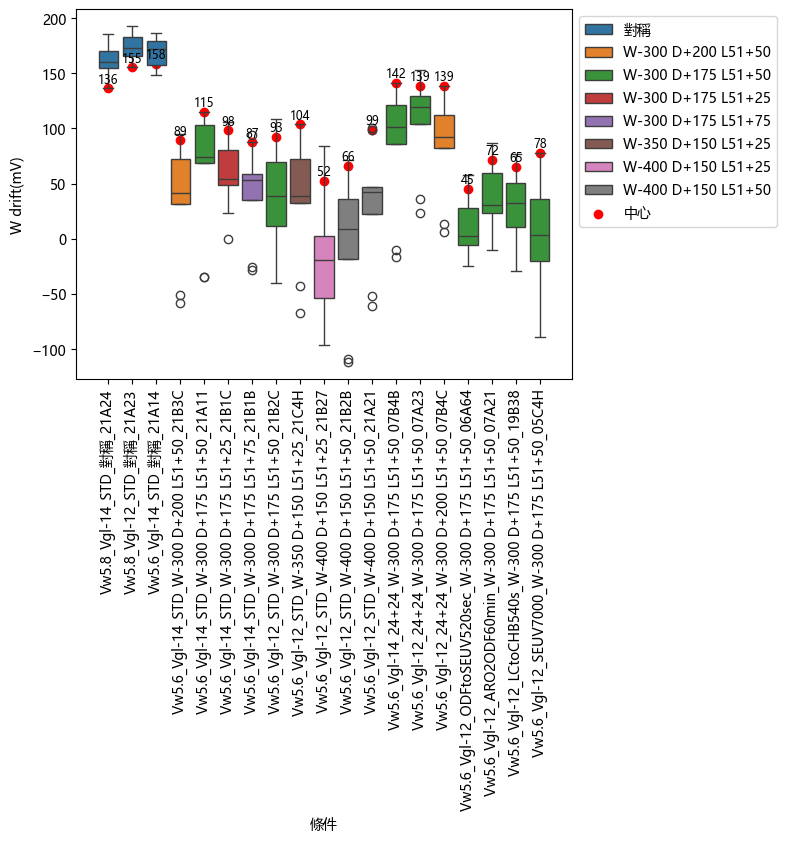

In [77]:

plot_df = (
    w_drift_df
        .with_columns(("Vw" +  pl.col("Vw").cast(str) + "_Vgl" + pl.col("VGLO").cast(str) + "_" + pl.col("Condition") + '_' + pl.col("Gamma Code") + '_' + pl.col("Panel ID")).alias('條件'))
        .rename({"W drift": "W drift(mV)"})
        .sort('條件')
)

# condition_order = {
#     e: i
#     for i, e in enumerate([
#         "Vw5.8_Vgl-14_STD_對稱",
#         "Vw5.8_Vgl-12_STD_對稱",
#         "Vw5.6_Vgl-14_STD_對稱",
#         "Vw5.6_Vgl-14_STD_W-300 D+200 L51+50",
#         "Vw5.6_Vgl-14_STD_W-300 D+175 L51+50",
#         "Vw5.6_Vgl-14_STD_W-300 D+175 L51+25",
#         "Vw5.6_Vgl-14_STD_W-300 D+175 L51+75",
#         "Vw5.6_Vgl-12_STD_W-300 D+175 L51+50",
#         "Vw5.6_Vgl-12_STD_W-350 D+150 L51+25",
#         "Vw5.6_Vgl-12_STD_W-400 D+150 L51+25",
#         "Vw5.6_Vgl-12_STD_W-400 D+150 L51+50",
#         "Vw5.6_Vgl-14_24+24_W-300 D+175 L51+50",
#         "Vw5.6_Vgl-12_24+24_W-300 D+175 L51+50",
#         "Vw5.6_Vgl-12_24+24_W-300 D+200 L51+50",
#         "Vw5.6_Vgl-12_ARO2ODF60min_W-300 D+175 L51+50",
#         "Vw5.6_Vgl-12_ODFtoSEUV520sec_W-300 D+175 L51+50",
#         "Vw5.6_Vgl-12_LCtoCHB540s_W-300 D+175 L51+50",
#         "Vw5.6_Vgl-12_SEUV7000_W-300 D+175 L51+50",
#     ])
# }
condition_order = {
    e: i
    for i, e in enumerate([
        "Vw5.8_Vgl-14_STD_對稱_21A24",
        "Vw5.8_Vgl-12_STD_對稱_21A23",
        "Vw5.6_Vgl-14_STD_對稱_21A14",
        "Vw5.6_Vgl-14_STD_W-300 D+200 L51+50_21B3C",
        "Vw5.6_Vgl-14_STD_W-300 D+175 L51+50_21A11",
        "Vw5.6_Vgl-14_STD_W-300 D+175 L51+25_21B1C",
        "Vw5.6_Vgl-14_STD_W-300 D+175 L51+75_21B1B",
        "Vw5.6_Vgl-12_STD_W-300 D+175 L51+50_21B2C",
        "Vw5.6_Vgl-12_STD_W-350 D+150 L51+25_21C4H",
        "Vw5.6_Vgl-12_STD_W-400 D+150 L51+25_21B27",
        "Vw5.6_Vgl-12_STD_W-400 D+150 L51+50_21B2B",
        "Vw5.6_Vgl-12_STD_W-400 D+150 L51+50_21A21",
        "Vw5.6_Vgl-14_24+24_W-300 D+175 L51+50_07B4B",
        "Vw5.6_Vgl-12_24+24_W-300 D+175 L51+50_07A23",
        "Vw5.6_Vgl-12_24+24_W-300 D+200 L51+50_07B4C",
        "Vw5.6_Vgl-12_ODFtoSEUV520sec_W-300 D+175 L51+50_06A64",
        "Vw5.6_Vgl-12_ARO2ODF60min_W-300 D+175 L51+50_07A21",
        "Vw5.6_Vgl-12_LCtoCHB540s_W-300 D+175 L51+50_19B38",
        "Vw5.6_Vgl-12_SEUV7000_W-300 D+175 L51+50_05C4H",
    ])
}
ax = sns.boxplot(
    plot_df.sort(pl.col("條件").replace(condition_order).cast(int)),
    x = "條件",
    y = "W drift(mV)",
    legend='auto',
    hue = "Gamma Code",
)
ax.scatter(
    data=plot_df.filter(pl.col("Region") == "[8]/[9]"),
    x='條件',
    y="W drift(mV)",
    c="r",
    label="中心",
)

for cond, y in plot_df.filter(pl.col("Region") == "[8]/[9]").select('條件', 'W drift(mV)').iter_rows():
    ax.text(cond, y+5, f"{y:.0f}",horizontalalignment='center', size='small')

ax.legend()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

_ = ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [153]:
df = pl.DataFrame({"fruit": ["banana", "apple", "orange", "grape"]})

# Define a custom order for fruits
fruit_order = {"apple": 1, "banana": 2, "orange": 3, "grape": 4}

# Create a new expression that maps fruit names to their custom order rank
sorted_df = df.sort(pl.col("fruit").replace(fruit_order))
print(sorted_df)

shape: (4, 1)
┌────────┐
│ fruit  │
│ ---    │
│ str    │
╞════════╡
│ apple  │
│ banana │
│ orange │
│ grape  │
└────────┘


In [ ]:

                                   
ax = sns.boxplot(
    w_drift_df
        .with_columns((pl.col("Condition") + '_' + pl.col("Gamma Code")).alias('條件'))
        .rename({"W drift": "W drift(mV)"})
        .sort('條件')
    ,
    x = "W drift(mV)",
    y = "條件",
    legend='full',
    # hue = "條件",
)
# ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

In [10]:
ushape_logs.filter(
    pl.col("灰階") == 128,
    # pl.col("Remark") == "center",
    pl.col("Stress Time(hr)") >= 1,
).with_columns(
    (pl.col("Condition") + pl.lit("-") + pl.col("Gamma Code")).alias("條件")
)

Gamma Code,Condition,Panel ID,Stress Time(hr),Region,Remark,灰階,系統 Vcom,白格 Vcom,黑格 Vcom,白格 Vcom(Fitting),黑格 Vcom(Fitting),白格最佳 Vcom 亮度(%),黑格最佳 Vcom 亮度(%),W(%),B(%),Total亮度差(%),AC IS亮度差(%),DC IS亮度差(%),白U擬合R^2,黑U擬合R^2,高阻抗PI黑階補值,高阻抗PI灰階補值,高阻抗PI只補黑階補值,中低阻抗PI白階補值,中低阻抗PI灰階補值,條件
str,str,str,f64,str,str,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str,str,str,str
"""L0+0""","""STD""","""21A11""",1.0,"""[8]/[9]""","""center""",128,276,283,290,283.303,289.072,99.9052,99.3262,100.178,100.153,0.0644588,0.579062,-0.514604,0.999384,0.999287,"""N/A""","""N/A""","""N/A""","""N/A""","""N/A""","""STD-L0+0"""
"""L0+0""","""STD""","""21A11""",6.0,"""[8]/[9]""","""center""",128,276,290,298,291.789,296.906,100.296,99.0506,101.261,100.891,0.409939,1.24554,-0.835597,0.999273,0.999201,"""N/A""","""N/A""","""N/A""","""N/A""","""N/A""","""STD-L0+0"""
"""L0+0""","""STD""","""21A14""",1.0,"""[8]/[9]""","""center""",128,277,285,282,285.168,282.657,100.578,100.004,100.847,100.153,0.719603,0.57393,0.145673,0.999671,0.999506,"""N/A""","""N/A""","""N/A""","""N/A""","""N/A""","""STD-L0+0"""
"""L0+0""","""STD""","""21A14""",6.0,"""[8]/[9]""","""center""",128,277,296,283,296.544,283.421,101.073,99.9341,102.708,100.069,2.66467,1.13865,1.52602,0.999009,0.999086,"""N/A""","""N/A""","""N/A""","""N/A""","""N/A""","""STD-L0+0"""


In [184]:
plot_df.filter(pl.col("Region") == "[8]/[9]")

Gamma Code,Condition,Panel ID,VGLO,Vw,Stress Time(hr),Region,Remark,灰階,系統 Vcom,白格 Vcom,黑格 Vcom,白格 Vcom(Fitting),黑格 Vcom(Fitting),白格最佳 Vcom 亮度(%),黑格最佳 Vcom 亮度(%),W(%),B(%),Total亮度差(%),AC IS亮度差(%),DC IS亮度差(%),白U擬合R^2,黑U擬合R^2,高阻抗PI黑階補值,高阻抗PI灰階補值,高阻抗PI只補黑階補值,中低阻抗PI白階補值,中低阻抗PI灰階補值,條件
str,str,str,i32,f64,f64,str,str,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str,str,str,str
"""W-300 D+175 L51+25""","""STD""","""21B1C""",-14,5.6,1.0,"""[8]/[9]""","""center""",128,280,286,293,284.692,292.301,99.8139,99.236,99.8618,99.8804,-0.045995,0.577812,-0.623806,0.99948,0.999152,"""N/A""","""N/A""","""N/A""","""N/A""","""N/A""","""Vw5.6_Vgl-14_STD_W-300 D+175 L…"
"""W-300 D+175 L51+25""","""STD""","""21B1C""",-14,5.6,1.0,"""[8]/[9]""","""center""",32,280,284,292,284.614,292.079,101.171,99.0204,101.642,101.964,-0.31485,2.15023,-2.46508,0.997601,0.996463,"""2""","""3""","""0""","""-2""","""1""","""Vw5.6_Vgl-14_STD_W-300 D+175 L…"
"""W-300 D+175 L51+25""","""STD""","""21B1C""",-14,5.6,1.0,"""[8]/[9]""","""center""",51,280,283,289,282.308,289.483,100.409,98.9263,100.578,100.583,-0.079047,1.48229,-1.56134,0.999096,0.998619,"""3""","""4""","""0""","""-3""","""2""","""Vw5.6_Vgl-14_STD_W-300 D+175 L…"
"""W-300 D+175 L51+50""","""ODFtoSEUV520sec""","""06A64""",-12,5.6,1.0,"""[8]/[9]""","""center""",128,272,278,278,279.445,279.125,100.639,100.368,100.808,100.695,0.291462,0.270996,0.0204667,0.999254,0.999236,"""N/A""","""N/A""","""N/A""","""N/A""","""N/A""","""Vw5.6_Vgl-12_ODFtoSEUV520sec_W…"
"""W-300 D+175 L51+50""","""ODFtoSEUV520sec""","""06A64""",-12,5.6,1.0,"""[8]/[9]""","""center""",32,272,279,278,278.566,278.149,101.714,101.053,102.145,101.531,0.756253,0.661347,0.094906,0.998504,0.998719,"""-3""","""-2""","""-3""","""3""","""1""","""Vw5.6_Vgl-12_ODFtoSEUV520sec_W…"
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""對稱""","""STD""","""21A23""",-12,5.8,1.0,"""[8]/[9]""","""center""",32,267,275,269,275.865,269.422,101.331,100.441,102.658,100.505,2.21091,0.889932,1.32098,0.996121,0.998064,"""-10""","""-4""","""-9""","""10""","""6""","""Vw5.8_Vgl-12_STD_對稱"""
"""對稱""","""STD""","""21A23""",-12,5.8,1.0,"""[8]/[9]""","""center""",51,267,275,268,275.794,270.079,100.992,100.159,101.933,100.23,1.85658,0.833551,1.02303,0.998546,0.998961,"""-9""","""-4""","""-8""","""9""","""6""","""Vw5.8_Vgl-12_STD_對稱"""
"""對稱""","""STD""","""21A24""",-14,5.8,1.0,"""[8]/[9]""","""center""",128,269,278,277,280.295,274.992,100.231,99.5987,100.423,99.6578,0.95602,0.63247,0.32355,0.999297,0.998729,"""N/A""","""N/A""","""N/A""","""N/A""","""N/A""","""Vw5.8_Vgl-14_STD_對稱"""


In [86]:
stress_time = 6
gray_level = 128

C:\TEMP\ipykernel_28104\3749406989.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


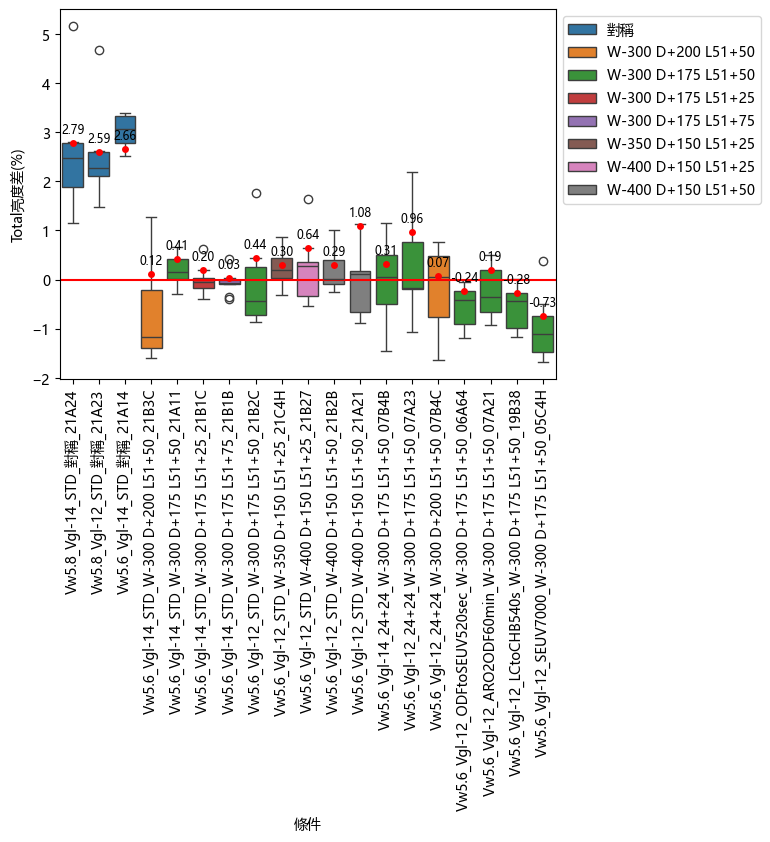

In [87]:
plot_df = (
    ushape_logs
        .with_columns(("Vw" +  pl.col("Vw").cast(str) + "_Vgl" + pl.col("VGLO").cast(str) + "_" + pl.col("Condition") + '_' + pl.col("Gamma Code") + '_' + pl.col("Panel ID")).alias('條件'))
        # .with_columns(("Vw" +  pl.col("Vw").cast(str) + "_Vgl" + pl.col("VGLO").cast(str) + "_" + pl.col("Condition") + '_' + pl.col("Gamma Code")).alias('條件'))
        .filter(
            pl.col("Stress Time(hr)") == stress_time,
            pl.col("灰階") == gray_level,
        )
)

ax = sns.boxplot(
    plot_df.sort(pl.col("條件").replace(condition_order).cast(int)),
    x = "條件",
    y = "Total亮度差(%)",
    legend='auto',
    hue = "Gamma Code",
)
sns.stripplot(
    data=plot_df.filter(pl.col("Region") == "[8]/[9]"),
    x='條件',
    y="Total亮度差(%)",
    c="r",
    ax=ax,
)

for cond, y in plot_df.filter(pl.col("Region") == "[8]/[9]").select('條件', 'Total亮度差(%)').iter_rows():
    ax.text(cond, y+0.2, f"{y:.2f}",horizontalalignment='center', size='small')

ax.legend()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.axhline(0, color='red', lw=1.5)
_ = ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

C:\TEMP\ipykernel_28104\3129938472.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


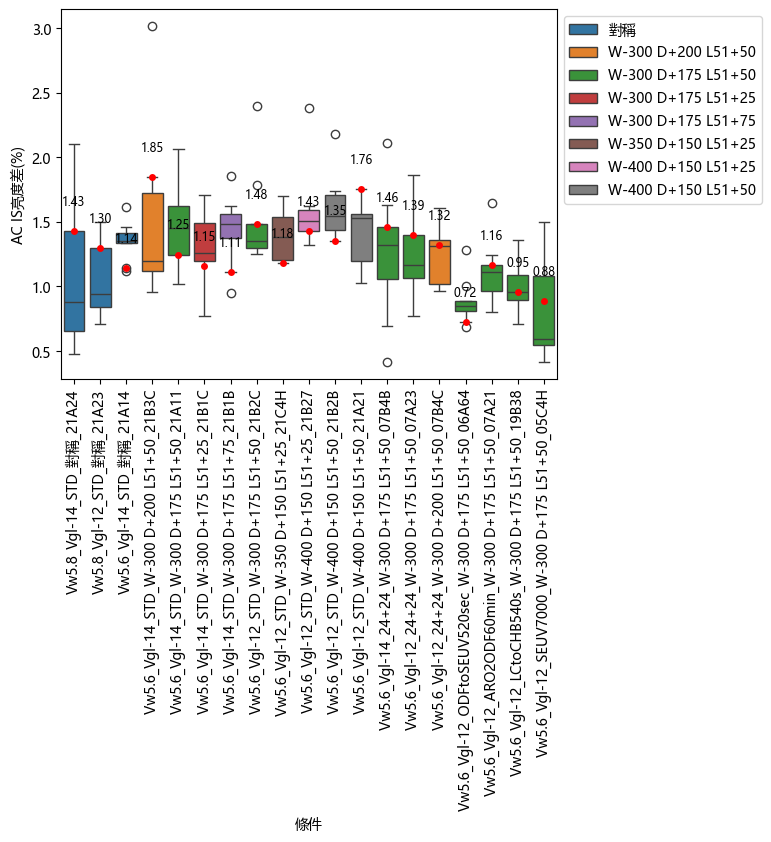

In [88]:
plot_df = (
    ushape_logs
        .with_columns(("Vw" +  pl.col("Vw").cast(str) + "_Vgl" + pl.col("VGLO").cast(str) + "_" + pl.col("Condition") + '_' + pl.col("Gamma Code") + '_' + pl.col("Panel ID")).alias('條件'))
        # .with_columns(("Vw" +  pl.col("Vw").cast(str) + "_Vgl" + pl.col("VGLO").cast(str) + "_" + pl.col("Condition") + '_' + pl.col("Gamma Code")).alias('條件'))
        .filter(
            pl.col("Stress Time(hr)") == stress_time,
            pl.col("灰階") == gray_level,
        )
)

ax = sns.boxplot(
    plot_df.sort(pl.col("條件").replace(condition_order).cast(int)),
    x = "條件",
    y = "AC IS亮度差(%)",
    legend='auto',
    hue = "Gamma Code",
)
sns.stripplot(
    data=plot_df.filter(pl.col("Region") == "[8]/[9]"),
    x='條件',
    y="AC IS亮度差(%)",
    c="r",
    ax=ax,
)

for cond, y in plot_df.filter(pl.col("Region") == "[8]/[9]").select('條件', 'AC IS亮度差(%)').iter_rows():
    ax.text(cond, y+0.2, f"{y:.2f}",horizontalalignment='center', size='small')

ax.legend()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# ax.axhline(0, color='red', lw=1.5)
_ = ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

C:\TEMP\ipykernel_28104\216422271.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


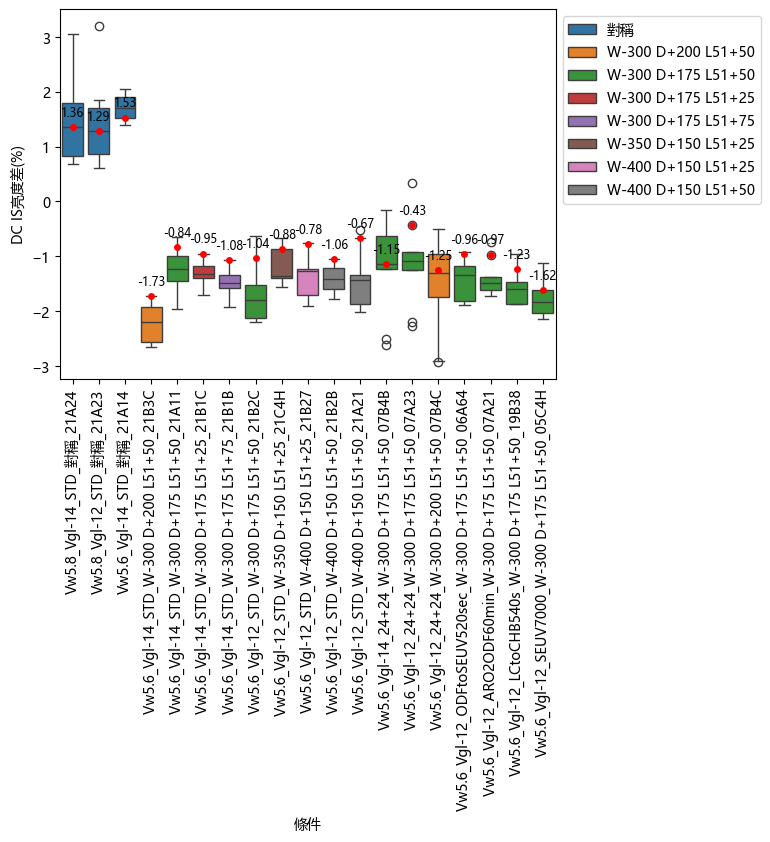

In [89]:
plot_df = (
    ushape_logs
        .with_columns(("Vw" +  pl.col("Vw").cast(str) + "_Vgl" + pl.col("VGLO").cast(str) + "_" + pl.col("Condition") + '_' + pl.col("Gamma Code") + '_' + pl.col("Panel ID")).alias('條件'))
        # .with_columns(("Vw" +  pl.col("Vw").cast(str) + "_Vgl" + pl.col("VGLO").cast(str) + "_" + pl.col("Condition") + '_' + pl.col("Gamma Code")).alias('條件'))
        .filter(
            pl.col("Stress Time(hr)") == stress_time,
            pl.col("灰階") == gray_level,
        )
)

ax = sns.boxplot(
    plot_df.sort(pl.col("條件").replace(condition_order).cast(int)),
    x = "條件",
    y = "DC IS亮度差(%)",
    legend='auto',
    hue = "Gamma Code",
)
sns.stripplot(
    data=plot_df.filter(pl.col("Region") == "[8]/[9]"),
    x='條件',
    y="DC IS亮度差(%)",
    c="r",
    ax=ax,
)

for cond, y in plot_df.filter(pl.col("Region") == "[8]/[9]").select('條件', 'DC IS亮度差(%)').iter_rows():
    ax.text(cond, y+0.2, f"{y:.2f}",horizontalalignment='center', size='small')

ax.legend()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# ax.axhline(0, color='red', lw=1.5)
_ = ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [121]:
# time duration parser test
from datetime import timedelta

import re
from datetime import timedelta

def strptime_timedelta_optional(time_str: str, fmt: str) -> timedelta:
    """
    Parses a time string into a timedelta object using a format string
    with optional components. Supports %d, %H, %M, %S.
    """
    # 1. Define the mapping of directives to capture groups
    # We use a pattern that captures one or more digits (\d+) for the value
    directives = {
        '%d': 'days',
        '%H': 'hours',
        '%M': 'minutes',
        '%S': 'seconds',
    }

    # 2. Build the Regex pattern dynamically
    regex_source = ""
    last_idx = 0
    
    # Iterate through the format string to find directives (%d, %H, etc.)
    for match in re.finditer(r'(%[dHMS])', fmt):
        start, end = match.span()
        directive = match.group(0)
        unit = directives[directive]
        
        # a. Capture the static text *before* the directive (e.g., 'Day', 'Hr')
        static_text = re.escape(fmt[last_idx:start])
        
        # b. Define the capture group for the value (e.g., (?P<days>\d+))
        capture_group = f"(?P<{unit}>\\d+)"
        
        # c. Combine the static text and the value capture group, making the whole block optional.
        # The structure is: ((static_text)(value_capture_group))?
        # This makes the unit label and its corresponding number optional *together*.
        regex_source += f"(?:{static_text}{capture_group})?"
        
        last_idx = end

    # 3. Add any trailing static text (e.g., if fmt ends with 's')
    regex_source += re.escape(fmt[last_idx:])

    # 4. Final match attempt
    match = re.match(f"^{regex_source}$", time_str)
    
    if match is None:
        raise ValueError(f"Time data '{time_str}' does not match format '{fmt}'")
    
    # 5. Extract values and convert to integers
    # Only include non-None matches (the optional parts that were present)
    data = {k: int(v) for k, v in match.groupdict().items() if v is not None}
    
    # 6. Create and return the timedelta
    return timedelta(**data)

In [124]:
time_str = "1d0Hr0Min3Sec"
fmt = "%dd%HHr%MMin%SSec"

strptime_timedelta_optional(time_str, fmt)

datetime.timedelta(days=1, seconds=3)

In [97]:
directives = {
        '%d': 'days',
        '%H': 'hours',
        '%M': 'minutes',
        '%S': 'seconds',
    }

# 2. Build the Regex pattern dynamically
regex_source = ""
last_idx = 0

# Iterate through the format string to find directives (%d, %H, etc.)
for match in re.finditer(r'(%[dHMS])', fmt):
    start, end = match.span()
    directive = match.group(0)
    unit = directives[directive]
    
    # a. Capture the static text *before* the directive (e.g., 'Day', 'Hr')
    static_text = re.escape(fmt[last_idx:start])
    
    # b. Define the capture group for the value (e.g., (?P<days>\d+))
    capture_group = f"(?P<{unit}>\\d+)"
    
    # c. Combine the static text and the value capture group, making the whole block optional.
    # The structure is: ((static_text)(value_capture_group))?
    # This makes the unit label and its corresponding number optional *together*.
    regex_source += f"(?:{static_text}{capture_group})?"
    
    last_idx = end

In [103]:
regex_source += re.escape(fmt[last_idx:])
regex_source

'(?:(?P<hours>\\d+))?(?:Hr(?P<minutes>\\d+))?(?:Min(?P<seconds>\\d+))?Sec'

In [117]:
match = re.match(f"^{regex_source}", time_str)

match.groupdict()

{'hours': '24', 'minutes': '0', 'seconds': '0'}

In [110]:
re.match(regex_source, "24Hr") is None

True

In [107]:
match.groupdict()

{'hours': '24', 'minutes': '0', 'seconds': '0'}